In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import circles
import os
import time
import sys
from matplotlib.collections import LineCollection

def print_fl(x):
    print(x)
    sys.stdout.flush()

In [10]:
InFile = "output_200_0.14_0.07.npz"
OutDir = "testje"

if not os.path.exists(OutDir):
    os.makedirs(OutDir)

In [11]:
Data = np.load(InFile)

In [12]:
NumSteps = Data["SaveLocation"].shape[0]

ExtremeBorders = np.zeros((NumSteps, 2, 2))
ExtremeBorders[:,0] = np.min(Data["SaveLocation"], axis=1)
ExtremeBorders[:,1] = np.max(Data["SaveLocation"], axis=1)

Centers = (ExtremeBorders[:,1,:] + ExtremeBorders[:,0,:])/2
Sizes = ExtremeBorders[:,1,:] - ExtremeBorders[:,0,:]
ExtremeSize = np.max(Sizes)

ExtremePositions = np.zeros((2,2)) # minmax x dim
ExtremePositions[0,:] = np.min(ExtremeBorders[:,0,:], axis=0)
ExtremePositions[1,:] = np.max(ExtremeBorders[:,1,:], axis=0)
MigrationReach = np.max(ExtremePositions[1,:] - ExtremePositions[0,:])
MigrationCenter = (ExtremePositions[1,:] + ExtremePositions[0,:])/2

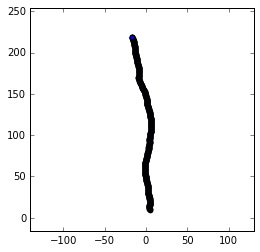

In [13]:
plt.scatter(Centers[:,0], Centers[:,1])
plt.xlim(MigrationCenter[0] + np.array([-1, 1]) * MigrationReach/2 * 1.1)
plt.ylim(MigrationCenter[1] + np.array([-1, 1]) * MigrationReach/2 * 1.1)
plt.gca().set_aspect('equal')

(-13.33149754992146, 32.302563781228777)

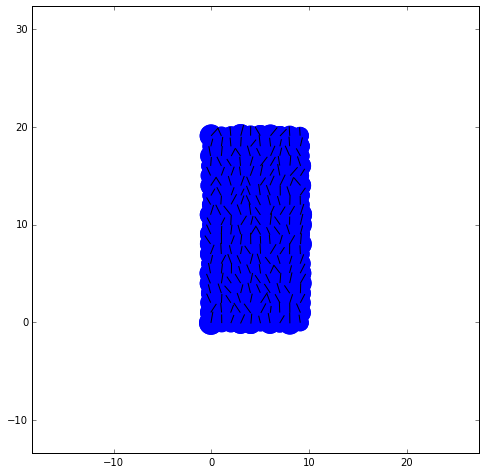

In [14]:
SaveLocation = Data["SaveLocation"]
SaveOrientation = Data["SaveOrientation"]
Radius = Data["Radius"]

NumParticles = SaveLocation.shape[1]

MarginFactorSheet = 1.1
MarginFactorCloseup = 1.0

t = 0

plt.figure(figsize=(18,8))
axSheet = plt.subplot(121, aspect='equal')
circles.circles(SaveLocation[t,:,0], SaveLocation[t,:,1], Radius, fc='none')

plt.xlim(MigrationCenter[0] + np.array([-1, 1]) * MigrationReach/2 * MarginFactorSheet)
plt.ylim(MigrationCenter[1] + np.array([-1, 1]) * MigrationReach/2 * MarginFactorSheet)


circles.circles(SaveLocation[t,:,0], SaveLocation[t,:,1], Radius, fc='none')

EndPoints = SaveLocation[t,:,:] + np.array([Radius * np.cos(SaveOrientation[t,:]), Radius * np.sin(SaveOrientation[t,:])]).T
LineSegments = np.zeros((NumParticles, 2, 2))
LineSegments[:,0,:] = SaveLocation[t,:,:]
LineSegments[:,1,:] = EndPoints

lines = LineCollection(LineSegments, color='k')
axSheet.add_collection(lines)

plt.xlim(Centers[t,0] + np.array([-1, 1]) * ExtremeSize/2 * MarginFactorCloseup)
plt.ylim(Centers[t,1] + np.array([-1, 1]) * ExtremeSize/2 * MarginFactorCloseup)

In [16]:
SaveLocation = Data["SaveLocation"]
SaveOrientation = Data["SaveOrientation"]
Radius = Data["Radius"]

NumParticles = SaveLocation.shape[1]

MarginFactorSheet = 1.1
MarginFactorCloseup = 1.0

for t in range(NumSteps):
    plt.figure(figsize=(18,8))
    axSheet = plt.subplot(121, aspect='equal')
    circles.circles(SaveLocation[t,:,0], SaveLocation[t,:,1], Radius, fc='none')

    plt.xlim(MigrationCenter[0] + np.array([-1, 1]) * MigrationReach/2 * MarginFactorSheet)
    plt.ylim(MigrationCenter[1] + np.array([-1, 1]) * MigrationReach/2 * MarginFactorSheet)

    axCloseUp = plt.subplot(122, aspect='equal')
    circles.circles(SaveLocation[t,1:,0], SaveLocation[t,1:,1], Radius, fc='none')
    circles.circles(SaveLocation[t,0,0], SaveLocation[t,0,1], Radius, fc='none', color='r')

    EndPoints = SaveLocation[t,:,:] + np.array([Radius * np.cos(SaveOrientation[t,:]), Radius * np.sin(SaveOrientation[t,:])]).T
    LineSegments = np.zeros((NumParticles, 2, 2))
    LineSegments[:,0,:] = SaveLocation[t,:,:]
    LineSegments[:,1,:] = EndPoints

    lines = LineCollection(LineSegments, color='k')
    axCloseUp.add_collection(lines)

    plt.xlim(Centers[t,0] + np.array([-1, 1]) * ExtremeSize/2 * MarginFactorCloseup)
    plt.ylim(Centers[t,1] + np.array([-1, 1]) * ExtremeSize/2 * MarginFactorCloseup)
    
    plt.savefig(OutDir + ("/frame-%08d.png" % t), dpi=300)
    plt.cla()
    plt.clf()
    plt.close()
    if (t % np.int(NumSteps / 100) < 1):
        print_fl("Progress: %d%%" % (t*100/NumSteps))

Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 48%
Progress: 49%
Progress: 50%
Progress: 51%
Progress: 52%
Progress: 53%
Progress: 54%
Progress: 55%
Progress: 56%
Progress: 57%
Progress: 58%
Progress: 59%
Progress: 60%
Progress: 61%
Progress: 62%
Progress: 63%
Progress: 64%
Progress: 65%
Progress: 66%
Progress: 67%
Progress: 68%
Progress: 69%
Progress: 70%
Progress: 71%
Pr

In [ ]:
plt.figure(figsize=(6,4))
ax = plt.subplot(aspect='equal')

#plot a set of circle
a = np.arange(11)
out = circles.circles(a, a, a*0.2, c=a, alpha=0.5, fc='none')
plt.colorbar() 
#or colorbar(out)

#plot a circle (the lower-right one)
circles.circles(1, 0, 0.4, 'r', ls='--', lw=5, fc='none', transform=ax.transAxes)

plt.xlim(0,10)
plt.ylim(0,10)